<a href="https://www.kaggle.com/code/lynncan/cyclistic-bikeshare-trip-data-project?scriptVersionId=110835050" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cyclistics-data-april-2020-march-2021/202011-divvy-tripdata.csv
/kaggle/input/cyclistics-data-april-2020-march-2021/202012-divvy-tripdata.csv
/kaggle/input/cyclistics-data-april-2020-march-2021/202004-divvy-tripdata.csv
/kaggle/input/cyclistics-data-april-2020-march-2021/202009-divvy-tripdata.csv
/kaggle/input/cyclistics-data-april-2020-march-2021/202006-divvy-tripdata.csv
/kaggle/input/cyclistics-data-april-2020-march-2021/202010-divvy-tripdata.csv
/kaggle/input/cyclistics-data-april-2020-march-2021/202008-divvy-tripdata.csv
/kaggle/input/cyclistics-data-april-2020-march-2021/202101-divvy-tripdata.csv
/kaggle/input/cyclistics-data-april-2020-march-2021/202007-divvy-tripdata.csv
/kaggle/input/cyclistics-data-april-2020-march-2021/202103-divvy-tripdata.csv
/kaggle/input/cyclistics-data-april-2020-march-2021/202104-divvy-tripdata.csv
/kaggle/input/cyclistics-data-april-2020-march-2021/202102-divvy-tripdata.csv
/kaggle/input/cyclistics-data-april-2020-march-2021/202005-divvy

# Cyclistic Bikeshare Trip Data Project
<p style='text-indent:30px'>This project is part of the Google Data Analytics Certificate courses. The data used in this project is provided by the course. The scenario is that Cyclistic is a bike-share company in Chicago. They have two types of users: one is a casual rider and the other is member. The company believes the company's future success depends on mamximizing the number of annual memberships. </p>
<p style='text-indent:30px'>The goal of this project is to understand how casual riders and annual riders use Cyclistic bikes differently. From these insights, a new marketing strategy will be developed to convert cacual riders into annual members.</p>
<p style='text-indent:30px'>For this project, we will focus on data from May 2021 to April 2022 only--the most recent data for the past 12 months.</p>

# Table of Contents

<strong>1. Data exploration</strong>
   <br>- Popular stations
   <br>- Popular bike types

<strong>2. Data exploration and analysis</strong>
<p style='text-indent: 30px'>2.1 "ride length" and "day of week"</p>
<p style='text-indent: 60px'>2.1.1 In a month: May 2021</p>
<p style='text-indent: 60px'>2.1.2 In a year: May 2021 - April 2022</p>
<p style='text-indent: 30px'>2.2 riding behaviors: casual riders VS. members</p>

<strong>3. Conclusions and Insights</strong>

In [2]:
# importing the necessary packages.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# storing data of each month into a separate variable.
may21data = pd.read_csv('../input/cyclisticsdatamay2021april2022/202105-divvy-tripdata.csv')
jun21data = pd.read_csv('../input/cyclisticsdatamay2021april2022/202106-divvy-tripdata.csv')
jul21data = pd.read_csv('../input/cyclisticsdatamay2021april2022/202107-divvy-tripdata.csv')
aug21data = pd.read_csv('../input/cyclisticsdatamay2021april2022/202108-divvy-tripdata.csv')
sep21data = pd.read_csv('../input/cyclisticsdatamay2021april2022/202109-divvy-tripdata.csv')
oct21data = pd.read_csv('../input/cyclisticsdatamay2021april2022/202110-divvy-tripdata.csv')
nov21data = pd.read_csv('../input/cyclisticsdatamay2021april2022/202111-divvy-tripdata.csv')
dec21data = pd.read_csv('../input/cyclisticsdatamay2021april2022/202112-divvy-tripdata.csv')
jan22data = pd.read_csv('../input/cyclisticsdatamay2021april2022/202201-divvy-tripdata.csv')
feb22data = pd.read_csv('../input/cyclisticsdatamay2021april2022/202202-divvy-tripdata.csv')
mar22data = pd.read_csv('../input/cyclisticsdatamay2021april2022/202203-divvy-tripdata.csv')
apr22data = pd.read_csv('../input/cyclisticsdatamay2021april2022/202204-divvy-tripdata.csv')
may21data.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')

Now that we have the trip data of each month stored in a variable. First, let's take a quick look at our data to get some understanding. We will mainly use May 2021 as an example.

In [4]:
# look at the first five rows of trip data of may 2021.
may21data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,C809ED75D6160B2A,electric_bike,2021-05-30 11:58:15,2021-05-30 12:10:39,NaN,NaN,NaN,NaN,41.90,-87.63,41.89,-87.61,casual
1,DD59FDCE0ACACAF3,electric_bike,2021-05-30 11:29:14,2021-05-30 12:14:09,NaN,NaN,NaN,NaN,41.88,-87.62,41.79,-87.58,casual
2,0AB83CB88C43EFC2,electric_bike,2021-05-30 14:24:01,2021-05-30 14:25:13,NaN,NaN,NaN,NaN,41.92,-87.70,41.92,-87.70,casual
3,7881AC6D39110C60,electric_bike,2021-05-30 14:25:51,2021-05-30 14:41:04,NaN,NaN,NaN,NaN,41.92,-87.70,41.94,-87.69,casual
4,853FA701B4582BAF,electric_bike,2021-05-30 18:15:39,2021-05-30 18:22:32,NaN,NaN,NaN,NaN,41.94,-87.69,41.94,-87.70,casual


For the purpose of this project, we will not worry about the latitude and longitude of starting place and ending place of each trip, as they would only change minimally.

In [5]:
# quick look at info about each column in may21data.
may21data.info() # We have some missing values in start_station and end_station information.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 531633 entries, 0 to 531632
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             531633 non-null  object 
 1   rideable_type       531633 non-null  object 
 2   started_at          531633 non-null  object 
 3   ended_at            531633 non-null  object 
 4   start_station_name  477889 non-null  object 
 5   start_station_id    477889 non-null  object 
 6   end_station_name    473439 non-null  object 
 7   end_station_id      473439 non-null  object 
 8   start_lat           531633 non-null  float64
 9   start_lng           531633 non-null  float64
 10  end_lat             531181 non-null  float64
 11  end_lng             531181 non-null  float64
 12  member_casual       531633 non-null  object 
dtypes: float64(4), object(9)
memory usage: 52.7+ MB


In [6]:
# What are the most popular starting stations in May 2021?
may21data['start_station_name'].value_counts()

Streeter Dr & Grand Ave           10217
Lake Shore Dr & Monroe St          6109
Millennium Park                    4921
Michigan Ave & Oak St              4808
Lake Shore Dr & North Blvd         4598
                                  ...  
South Chicago Ave & Elliot Ave        1
N Clark St & W Elm St                 1
S Wentworth Ave & W 111th St          1
W 103rd St & S Avers Ave              1
Racine Ave & 61st St                  1
Name: start_station_name, Length: 687, dtype: int64

In [7]:
# What are the most popular ending stations in May 2021?
may21data['end_station_name'].value_counts()

Streeter Dr & Grand Ave         10711
Lake Shore Dr & Monroe St        5882
Millennium Park                  4992
Michigan Ave & Oak St            4868
Lake Shore Dr & North Blvd       4643
                                ...  
Kedzie Ave & 104th St               2
Carpenter St & 63rd St              2
S Wentworth Ave & W 111th St        2
Torrence Ave & 106th St             1
W 103rd St & S Avers Ave            1
Name: end_station_name, Length: 683, dtype: int64

In [8]:
# and quick look at data of June 2021. 
jun21data.count() # Looks like from May to June in 2021, more rides are being made with Cyclistic in Chicago.

ride_id               729595
rideable_type         729595
started_at            729595
ended_at              729595
start_station_name    649502
start_station_id      649502
end_station_name      643208
end_station_id        643208
start_lat             729595
start_lng             729595
end_lat               728878
end_lng               728878
member_casual         729595
dtype: int64

In [9]:
# and quick look at data of March 2022.
mar22data.count() # The amount of rides can change drastically from month to month.

ride_id               284042
rideable_type         284042
started_at            284042
ended_at              284042
start_station_name    236796
start_station_id      236796
end_station_name      232885
end_station_id        232885
start_lat             284042
start_lng             284042
end_lat               283776
end_lng               283776
member_casual         284042
dtype: int64

<font size='4'><strong>Summary</strong></font>

From our initial exploration of the data, we made the following discoveries:

1. Some stations are much busier than others, and we can identify these popular stations;

2. The amount of total rides can change drastically from month to month.

Next, we will dig deeper into our data and see what we can find.

<font size='5'><strong>2. Data exploration and analysis</strong></font>

<strong>2.1 "Ride length" and "day of week"</strong><br>
In this part, we will perfrom analysis by two steps. <br><strong>Step 1</strong>: we will study the riding behaviors over 12 month's time, treating casual riders and members as one group. An in-depth study of May 2021 data will be done before moving on to the 12-month yearly trend analysis.<br> <strong>Step 2</strong>: casual riders and members will be differentiated and analyzed side by side.<br>
First of all, let's verify if the trip data of different months have the same columns.

In [10]:
may21data.columns == feb22data.columns # Looks like the answer is yes.

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [11]:
sep21data.columns == apr22data.columns # Yes again.

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

<AxesSubplot:xlabel='rideable_type', ylabel='count'>

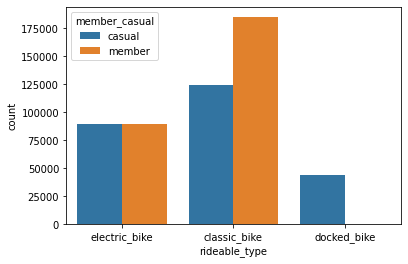

In [12]:
# Is there a preferred bike type by different riders?
sns.countplot(x='rideable_type', data=may21data, hue='member_casual')

<strong>2.1.1 In a month: May 2021</strong><br>
For now, we will perform a deeper analysis of May 2021 data and see what we can find.

In [13]:
# making a copy of the original May data to do the analysis.
copy_may21data = may21data.copy()
copy_may21data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,C809ED75D6160B2A,electric_bike,2021-05-30 11:58:15,2021-05-30 12:10:39,NaN,NaN,NaN,NaN,41.90,-87.63,41.89,-87.61,casual
1,DD59FDCE0ACACAF3,electric_bike,2021-05-30 11:29:14,2021-05-30 12:14:09,NaN,NaN,NaN,NaN,41.88,-87.62,41.79,-87.58,casual
2,0AB83CB88C43EFC2,electric_bike,2021-05-30 14:24:01,2021-05-30 14:25:13,NaN,NaN,NaN,NaN,41.92,-87.70,41.92,-87.70,casual
3,7881AC6D39110C60,electric_bike,2021-05-30 14:25:51,2021-05-30 14:41:04,NaN,NaN,NaN,NaN,41.92,-87.70,41.94,-87.69,casual
4,853FA701B4582BAF,electric_bike,2021-05-30 18:15:39,2021-05-30 18:22:32,NaN,NaN,NaN,NaN,41.94,-87.69,41.94,-87.70,casual


In [14]:
# converting the "started_at" and "ended_at" columns into datetime object to perform calculations.
copy_may21data['started_at'] = pd.to_datetime(copy_may21data['started_at'])
copy_may21data['ended_at'] = pd.to_datetime(copy_may21data['ended_at'])
copy_may21data['ride_length'] = copy_may21data['ended_at'] - copy_may21data['started_at']
copy_may21data['ride_length'] = round(copy_may21data['ride_length'].dt.total_seconds()/60)
print(copy_may21data.head())

            ride_id  rideable_type          started_at            ended_at  \
0  C809ED75D6160B2A  electric_bike 2021-05-30 11:58:15 2021-05-30 12:10:39   
1  DD59FDCE0ACACAF3  electric_bike 2021-05-30 11:29:14 2021-05-30 12:14:09   
2  0AB83CB88C43EFC2  electric_bike 2021-05-30 14:24:01 2021-05-30 14:25:13   
3  7881AC6D39110C60  electric_bike 2021-05-30 14:25:51 2021-05-30 14:41:04   
4  853FA701B4582BAF  electric_bike 2021-05-30 18:15:39 2021-05-30 18:22:32   

  start_station_name start_station_id end_station_name end_station_id  \
0                NaN              NaN              NaN            NaN   
1                NaN              NaN              NaN            NaN   
2                NaN              NaN              NaN            NaN   
3                NaN              NaN              NaN            NaN   
4                NaN              NaN              NaN            NaN   

   start_lat  start_lng  end_lat  end_lng member_casual  ride_length  
0      41.90     -87.

In [15]:
copy_may21data['ride_length'].max()
copy_may21data['ride_length'].describe()

count    531633.000000
mean         26.040120
std         208.441108
min           0.000000
25%           8.000000
50%          14.000000
75%          25.000000
max       53922.000000
Name: ride_length, dtype: float64

In [16]:
# adding a new column "day_of_week" to see rider behavior throught a week.
copy_may21data['day_of_week'] = copy_may21data['started_at'].dt.dayofweek
copy_may21data['day_of_week'].value_counts() # Satuaday and Sunday see the greatest number of rides.

5    112002
6    104262
0     76001
4     66219
2     62596
3     58542
1     52011
Name: day_of_week, dtype: int64

<AxesSubplot:xlabel='member_casual', ylabel='count'>

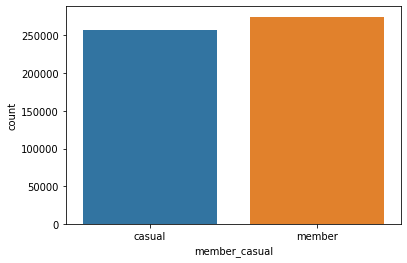

In [17]:
# visualizing total rides made by casual riders and members in May 2021.
sns.countplot(x='member_casual', data=copy_may21data)

<AxesSubplot:xlabel='member_casual', ylabel='ride_length'>

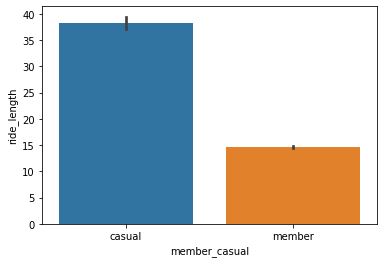

In [18]:
# visualizing average ride length by casual riders and members in May 2021.
sns.barplot(x='member_casual', y='ride_length', data=copy_may21data)

<AxesSubplot:xlabel='day_of_week', ylabel='count'>

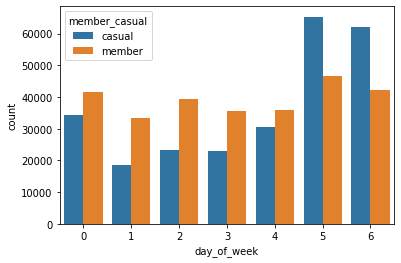

In [19]:
# visualizing total rides on each day of week by casual riders and members in May 2021.
sns.countplot(x='day_of_week', data=copy_may21data, hue='member_casual')

<strong>2.1.2 In a year: May 2021 to April 2022</strong><br>
Next, we will study the overall trend over 12 months, without distinguishing between casual riders and members.

In [20]:
# creating a new dataframe consisting only of all the starting_at and ending_at columns of the 12 months.
total_ride = pd.DataFrame({'may21_start':may21data['started_at'], 'may21_end':may21data['ended_at'], 
                              'jun21_start':jun21data['started_at'], 'jun21_end':jun21data['ended_at'],
                              'jul21_start':jul21data['started_at'], 'jul21_end':jul21data['ended_at'],
                              'aug21_start':aug21data['started_at'], 'aug21_end':aug21data['ended_at'],
                              'sep21_start':sep21data['started_at'], 'sep21_end':sep21data['ended_at'],
                              'oct21_start':oct21data['started_at'], 'oct21_end':oct21data['ended_at'],
                              'nov21_start':nov21data['started_at'], 'nov21_end':nov21data['ended_at'],
                              'dec21_start':dec21data['started_at'], 'dec21_end':dec21data['ended_at'],
                              'jan22_start':jan22data['started_at'], 'jan22_end':jan22data['ended_at'],
                              'feb22_start':feb22data['started_at'], 'feb22_end':feb22data['ended_at'],
                              'mar22_start':mar22data['started_at'], 'mar22_end':mar22data['ended_at'],
                              'apr22_start':apr22data['started_at'], 'apr22_end':apr22data['ended_at']})
total_ride.head()

,may21_start,may21_end,jun21_start,jun21_end,jul21_start,jul21_end,aug21_start,aug21_end,sep21_start,sep21_end,...,dec21_start,dec21_end,jan22_start,jan22_end,feb22_start,feb22_end,mar22_start,mar22_end,apr22_start,apr22_end
0,2021-05-30 11:58:15,2021-05-30 12:10:39,2021-06-13 14:31:28,2021-06-13 14:34:11,2021-07-02 14:44:36,2021-07-02 15:19:58,2021-08-10 17:15:49,2021-08-10 17:22:44,2021-09-28 16:07:10,2021-09-28 16:09:54,...,2021-12-07 15:06:07,2021-12-07 15:13:42,2022-01-13 11:59:47,2022-01-13 12:02:44,2022-02-19 18:08:41,2022-02-19 18:23:56,2022-03-21 13:45:01,2022-03-21 13:51:18,2022-04-06 17:42:48,2022-04-06 17:54:36
1,2021-05-30 11:29:14,2021-05-30 12:14:09,2021-06-04 11:18:02,2021-06-04 11:24:19,2021-07-07 16:57:42,2021-07-07 17:16:09,2021-08-10 17:23:14,2021-08-10 17:39:24,2021-09-28 14:24:51,2021-09-28 14:40:05,...,2021-12-11 03:43:29,2021-12-11 04:10:23,2022-01-10 08:41:56,2022-01-10 08:46:17,2022-02-20 17:41:30,2022-02-20 17:45:56,2022-03-16 09:37:16,2022-03-16 09:43:34,2022-04-24 19:23:07,2022-04-24 19:43:17
2,2021-05-30 14:24:01,2021-05-30 14:25:13,2021-06-04 09:49:35,2021-06-04 09:55:34,2021-07-25 11:30:55,2021-07-25 11:48:45,2021-08-21 02:34:23,2021-08-21 02:50:36,2021-09-28 00:20:16,2021-09-28 00:23:57,...,2021-12-15 23:10:28,2021-12-15 23:23:14,2022-01-25 04:53:40,2022-01-25 04:58:01,2022-02-25 18:55:56,2022-02-25 19:09:34,2022-03-23 19:52:02,2022-03-23 19:54:48,2022-04-20 19:29:08,2022-04-20 19:35:16
3,2021-05-30 14:25:51,2021-05-30 14:41:04,2021-06-03 19:56:05,2021-06-03 20:21:55,2021-07-08 22:08:30,2021-07-08 22:23:32,2021-08-21 06:52:55,2021-08-21 07:08:13,2021-09-28 14:51:17,2021-09-28 15:00:06,...,2021-12-26 16:16:10,2021-12-26 16:30:53,2022-01-04 00:18:04,2022-01-04 00:33:00,2022-02-14 11:57:03,2022-02-14 12:04:00,2022-03-01 19:12:26,2022-03-01 19:22:14,2022-04-22 21:14:06,2022-04-22 21:23:29
4,2021-05-30 18:15:39,2021-05-30 18:22:32,2021-06-04 14:05:51,2021-06-04 14:09:59,2021-07-28 16:08:06,2021-07-28 16:27:09,2021-08-19 11:55:29,2021-08-19 12:04:11,2021-09-28 09:53:12,2021-09-28 10:03:44,...,2021-12-30 11:31:05,2021-12-30 11:51:21,2022-01-20 01:31:10,2022-01-20 01:37:12,2022-02-16 05:36:06,2022-02-16 05:39:00,2022-03-21 18:37:01,2022-03-21 19:19:11,2022-04-16 15:56:30,2022-04-16 16:02:11


In [21]:
# converting values of each column from object to datetime.
for i in range(24):
    total_ride.iloc[:,i] = pd.to_datetime(total_ride.iloc[:, i])
total_ride.dtypes

may21_start    datetime64[ns]
may21_end      datetime64[ns]
jun21_start    datetime64[ns]
jun21_end      datetime64[ns]
jul21_start    datetime64[ns]
jul21_end      datetime64[ns]
aug21_start    datetime64[ns]
aug21_end      datetime64[ns]
sep21_start    datetime64[ns]
sep21_end      datetime64[ns]
oct21_start    datetime64[ns]
oct21_end      datetime64[ns]
nov21_start    datetime64[ns]
nov21_end      datetime64[ns]
dec21_start    datetime64[ns]
dec21_end      datetime64[ns]
jan22_start    datetime64[ns]
jan22_end      datetime64[ns]
feb22_start    datetime64[ns]
feb22_end      datetime64[ns]
mar22_start    datetime64[ns]
mar22_end      datetime64[ns]
apr22_start    datetime64[ns]
apr22_end      datetime64[ns]
dtype: object

In [22]:
# creating a new dataframe "year_ride" to store the ride_length data.
year_ride = pd.DataFrame()
for i in range(0,24,2):
        year_ride[i/2]=round((total_ride.iloc[:,i+1] - total_ride.iloc[:,i]).dt.total_seconds()/60)
        

year_ride.head()


,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0
0,12.0,3.0,35.0,7.0,3.0,3.0,19.0,8.0,3.0,15.0,6.0,12.0
1,45.0,6.0,18.0,16.0,15.0,2.0,18.0,27.0,4.0,4.0,6.0,20.0
2,1.0,6.0,18.0,16.0,4.0,8.0,2.0,13.0,4.0,14.0,3.0,6.0
3,15.0,26.0,15.0,15.0,9.0,1.0,5.0,15.0,15.0,7.0,10.0,9.0
4,7.0,4.0,19.0,9.0,11.0,8.0,21.0,20.0,6.0,3.0,42.0,6.0


In [23]:
year_ride.columns

Float64Index([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0], dtype='float64')

In [24]:
# renaming the columns to make it easier to understand.
year_ride.rename(columns={0.0:'may_ride_length', 1.0:'jun_ride_length', 2.0:'jul_ride_length', 3.0:'aug_ride_length',
                          4.0:'sep_ride_length', 5.0:'oct_ride_length', 6.0:'nov_ride_length', 7.0:'dec_ride_length',
                          8.0:'jan_ride_length', 9.0:'feb_ride_length', 10.0:'mar_ride_length', 11.0:'apr_ride_length'}, 
                            inplace=True)
year_ride.head(10)

,may_ride_length,jun_ride_length,jul_ride_length,aug_ride_length,sep_ride_length,oct_ride_length,nov_ride_length,dec_ride_length,jan_ride_length,feb_ride_length,mar_ride_length,apr_ride_length
0,12.0,3.0,35.0,7.0,3.0,3.0,19.0,8.0,3.0,15.0,6.0,12.0
1,45.0,6.0,18.0,16.0,15.0,2.0,18.0,27.0,4.0,4.0,6.0,20.0
2,1.0,6.0,18.0,16.0,4.0,8.0,2.0,13.0,4.0,14.0,3.0,6.0
3,15.0,26.0,15.0,15.0,9.0,1.0,5.0,15.0,15.0,7.0,10.0,9.0
4,7.0,4.0,19.0,9.0,11.0,8.0,21.0,20.0,6.0,3.0,42.0,6.0
5,24.0,7.0,6.0,7.0,7.0,14.0,19.0,9.0,3.0,16.0,5.0,4.0
6,15.0,6.0,12.0,16.0,22.0,3.0,6.0,6.0,17.0,4.0,3.0,5.0
7,18.0,6.0,8.0,6.0,23.0,8.0,1.0,19.0,12.0,9.0,11.0,12.0
8,3.0,9.0,20.0,0.0,12.0,7.0,5.0,10.0,25.0,6.0,11.0,1.0
9,26.0,9.0,13.0,17.0,22.0,8.0,9.0,16.0,7.0,6.0,13.0,1.0


In [25]:
# calculating the amount of total rides per month and storing it into a list "ride_counts".
ride_counts = []
for i in range(0,12):
    ride_counts.append(year_ride.iloc[:,i].notnull().sum())

ride_counts = pd.Series(ride_counts, index=['May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb','Mar','Apr'])

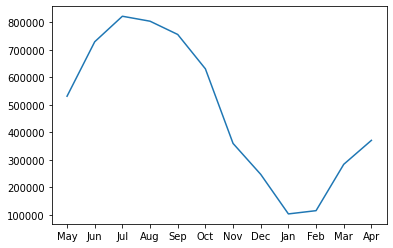

In [26]:
plt.plot(ride_counts)

In [27]:
# identifying how many negative values, namely errors, are in our list.
year_ride[year_ride < 0].count()

may_ride_length     0
jun_ride_length     2
jul_ride_length     0
aug_ride_length    10
sep_ride_length    19
oct_ride_length     0
nov_ride_length    53
dec_ride_length     0
jan_ride_length     0
feb_ride_length     0
mar_ride_length     1
apr_ride_length     0
dtype: int64

In [28]:
# converting these negative values to 0.
year_ride[year_ride<0] = 0
year_ride[year_ride<0].count()

may_ride_length    0
jun_ride_length    0
jul_ride_length    0
aug_ride_length    0
sep_ride_length    0
oct_ride_length    0
nov_ride_length    0
dec_ride_length    0
jan_ride_length    0
feb_ride_length    0
mar_ride_length    0
apr_ride_length    0
dtype: int64

Let's look at the monthly average ride length and how it changes over the year.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

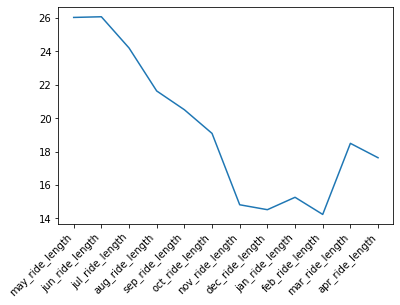

In [29]:
# calculating monthly average ride length and then visualize it.
avg_ride_length = year_ride.mean(skipna=True)
plt.plot(avg_ride_length)
plt.xticks(rotation=45,ha='right')

<font size='4'><strong>Summary</strong></font>

<p style='text-indent: 30px'>From the above analysis, we have the following observations:</p>

<p style='text-indent: 30px'>The number of rides and average riding time changes drastically over 12 months' time. November through February is the slow season for bike rides, by both metrics. The underlying reason is not difficult to understand. These winter months in Chicago are very cold, discouraging many people from riding a bike. From May through October, on the other hand, is when the most bike rides were made and each bike ride has the longest riding time on average.</p>

<p style='text-indent: 30px'>Therefore, the recommendation is that for any marketing strategy to enjoy the greatest success, <strong>the best time to promote Cyclistic bike-share is from May through October. During these months, Cyclistic can most likely reach the greatest number of customers.</strong></p>

<font size='5'>**2.2 Riding behaviors: casual riders VS. members**</font><br>
<font size='4'><p style='text-indent: 30px'>Central question: **do casual riders and members use Cyclistic bikes differently over the 12 months?** This will be our focus for the following part of analysis. First, we concatenate all the observations from May 2021 to April 2022 to form a single dataframe, "total_year_ride".</p></font>

In [30]:
# here we concatenate 12 months' data, forming a dataframe of over 5 million rows.
total_year_ride = pd.concat([may21data,jun21data,jul21data,aug21data,sep21data,oct21data,nov21data,dec21data,jan22data,feb22data,mar22data,apr22data])
total_year_ride

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,C809ED75D6160B2A,electric_bike,2021-05-30 11:58:15,2021-05-30 12:10:39,NaN,NaN,NaN,NaN,41.900000,-87.630000,41.890000,-87.610000,casual
1,DD59FDCE0ACACAF3,electric_bike,2021-05-30 11:29:14,2021-05-30 12:14:09,NaN,NaN,NaN,NaN,41.880000,-87.620000,41.790000,-87.580000,casual
2,0AB83CB88C43EFC2,electric_bike,2021-05-30 14:24:01,2021-05-30 14:25:13,NaN,NaN,NaN,NaN,41.920000,-87.700000,41.920000,-87.700000,casual
3,7881AC6D39110C60,electric_bike,2021-05-30 14:25:51,2021-05-30 14:41:04,NaN,NaN,NaN,NaN,41.920000,-87.700000,41.940000,-87.690000,casual
4,853FA701B4582BAF,electric_bike,2021-05-30 18:15:39,2021-05-30 18:22:32,NaN,NaN,NaN,NaN,41.940000,-87.690000,41.940000,-87.700000,casual
...,...,...,...,...,...,...,...,...,...,...,...,...,...
371244,C5A123D7BF8D350A,electric_bike,2022-04-22 15:54:11,2022-04-22 16:20:59,Streeter Dr & Grand Ave,13022,California Ave & North Ave,13258,41.892296,-87.612198,41.910475,-87.696894,member
371245,F7FCC7C26D8D137D,electric_bike,2022-04-21 20:18:17,2022-04-21 20:46:45,Streeter Dr & Grand Ave,13022,California Ave & North Ave,13258,41.892295,-87.612323,41.910475,-87.696894,member
371246,43D351300A40000A,classic_bike,2022-04-21 16:46:02,2022-04-21 17:15:05,Franklin St & Monroe St,TA1309000007,St. Clair St & Erie St,13016,41.880317,-87.635185,41.894345,-87.622798,member
371247,1618BFEEA7B566EF,electric_bike,2022-04-16 13:19:44,2022-04-16 13:37:31,Ashland Ave & Blackhawk St,13224,Southport Ave & Waveland Ave,13235,41.907094,-87.667217,41.948150,-87.663940,casual


In [31]:
# we make a copy of "total_year_ride" selecting only the rows we are interested in.
member_casual_ride = total_year_ride.copy()[['rideable_type', 'started_at','start_station_name', 'ended_at','end_station_name', 'member_casual', ]]
member_casual_ride.head()

,rideable_type,started_at,start_station_name,ended_at,end_station_name,member_casual
0,electric_bike,2021-05-30 11:58:15,NaN,2021-05-30 12:10:39,NaN,casual
1,electric_bike,2021-05-30 11:29:14,NaN,2021-05-30 12:14:09,NaN,casual
2,electric_bike,2021-05-30 14:24:01,NaN,2021-05-30 14:25:13,NaN,casual
3,electric_bike,2021-05-30 14:25:51,NaN,2021-05-30 14:41:04,NaN,casual
4,electric_bike,2021-05-30 18:15:39,NaN,2021-05-30 18:22:32,NaN,casual


<font size='4'>Next, we convert the "started_at" and "ended_at" columns to datetime object, and add the new columns "ride_length" and "day_of_week" to dataframe "member_casual_ride" as we did above.</font>

In [32]:
# converting the "started_at" and "ended_at" columns to datetime, and adding the new columns.
member_casual_ride['started_at'] = pd.to_datetime(member_casual_ride['started_at'])
member_casual_ride['ended_at'] = pd.to_datetime(member_casual_ride['ended_at'])
member_casual_ride['ride_length'] = member_casual_ride['ended_at'] - member_casual_ride['started_at']
member_casual_ride['ride_length'] = round(member_casual_ride['ride_length'].dt.total_seconds()/60)
member_casual_ride['day_of_week'] = member_casual_ride['started_at'].dt.dayofweek
member_casual_ride.head()

,rideable_type,started_at,start_station_name,ended_at,end_station_name,member_casual,ride_length,day_of_week
0,electric_bike,2021-05-30 11:58:15,NaN,2021-05-30 12:10:39,NaN,casual,12.0,6
1,electric_bike,2021-05-30 11:29:14,NaN,2021-05-30 12:14:09,NaN,casual,45.0,6
2,electric_bike,2021-05-30 14:24:01,NaN,2021-05-30 14:25:13,NaN,casual,1.0,6
3,electric_bike,2021-05-30 14:25:51,NaN,2021-05-30 14:41:04,NaN,casual,15.0,6
4,electric_bike,2021-05-30 18:15:39,NaN,2021-05-30 18:22:32,NaN,casual,7.0,6


In [33]:
# extracting the month information for each ride and making it a new column.
member_casual_ride['month'] = member_casual_ride['started_at'].dt.month_name().str[:3]
member_casual_ride.head()

,rideable_type,started_at,start_station_name,ended_at,end_station_name,member_casual,ride_length,day_of_week,month
0,electric_bike,2021-05-30 11:58:15,NaN,2021-05-30 12:10:39,NaN,casual,12.0,6,May
1,electric_bike,2021-05-30 11:29:14,NaN,2021-05-30 12:14:09,NaN,casual,45.0,6,May
2,electric_bike,2021-05-30 14:24:01,NaN,2021-05-30 14:25:13,NaN,casual,1.0,6,May
3,electric_bike,2021-05-30 14:25:51,NaN,2021-05-30 14:41:04,NaN,casual,15.0,6,May
4,electric_bike,2021-05-30 18:15:39,NaN,2021-05-30 18:22:32,NaN,casual,7.0,6,May


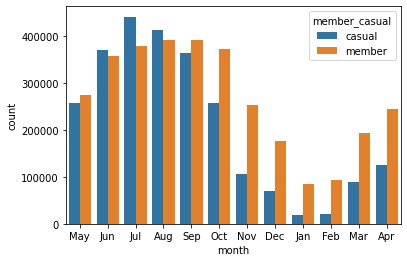

In [34]:
# visulizing how the total number of rides vary monthly by comparing casual riders and annual members.
sns.countplot(x='month',data=member_casual_ride, hue='member_casual')
plt.savefig('viz2.jpg')

<font size='4'><p style='text-indent: 30px'>At a first look, both casual riders and annual members follow the riding pattern we observed earlier, that is, May through October see much more rides than from November to April. A closer look reveals that by comparison, still, **there is greater variability among casual riders than members when it comes to whether or not to ride**. In other words, an annual membership motivated members to ride bikes more even in winter months, while casual riders' decisions of whether or not to ride are more sensitive to weather changes. </p></font>

<AxesSubplot:xlabel='day_of_week', ylabel='count'>

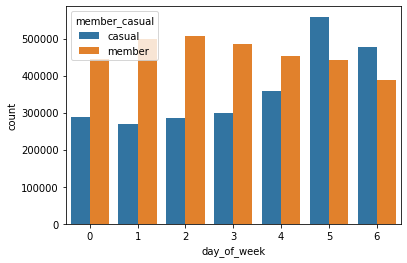

In [35]:
# looking at the overall amount of rides falling on each day of week over a year's time.
sns.countplot(x='day_of_week', data=member_casual_ride, hue='member_casual')

<font size='4'><p style='text-indent: 30px'>Again, we oberve that members ride Cyclitic bikes more consistently throughout a week while casual riders's rides peak on the weenkeds. **This means that a marketing campaign will most likely reach the most customers if held on the weekends.**</p></font>

<AxesSubplot:xlabel='rideable_type', ylabel='count'>

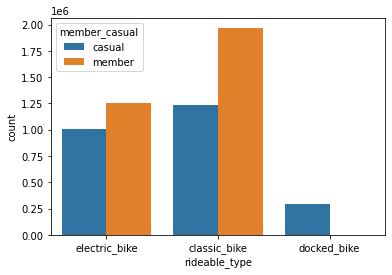

In [36]:
sns.countplot(x='rideable_type', data=member_casual_ride, hue='member_casual')

<font size='4'>The above visualization shows that **both casual riders and annual members prefer electric bikes and classic bikes over docked bikes**. This makes sense since dockless bikes offer riders the flexibility of leaving the bike wherever they want after arriving at their destination, without worrying out finding a docking station to dock the bike.</font>

In [37]:
# showing the most popular start stations over 12 months' time.
member_casual_ride['start_station_name'].value_counts()

Streeter Dr & Grand Ave                         84653
Wells St & Concord Ln                           43733
Michigan Ave & Oak St                           43399
Millennium Park                                 41708
Clark St & Elm St                               40836
                                                ...  
Throop/Hastings Mobile Station                      2
351                                                 2
Pawel Bialowas - Test- PBSC charging station        1
Lyft Driver Center Private Rack                     1
Whipple St & Irving Park Rd                         1
Name: start_station_name, Length: 865, dtype: int64

In [38]:
# showing the most popular ending stations over 12 months' time.
member_casual_ride['end_station_name'].value_counts()

Streeter Dr & Grand Ave                         85452
Wells St & Concord Ln                           43793
Michigan Ave & Oak St                           43759
Millennium Park                                 42206
Clark St & Elm St                               39993
                                                ...  
Whipple St & Irving Park Rd                         2
Hastings WH 2                                       2
Throop/Hastings Mobile Station                      1
Pawel Bialowas - Test- PBSC charging station        1
Lyft Driver Center Private Rack                     1
Name: end_station_name, Length: 864, dtype: int64

<font size='4'>Now that we've **identified the popular riding stations**, we can use these information to host future marketing campaigns. In other words, hosting marketing campaigns at these populare riding stations will most likely reach the greatest customers.</font>

In [39]:
# creating a pivot table of the amount of rides by each group over 12 months.
member_casual_count = member_casual_ride.pivot_table(index='month', columns='member_casual', values='ride_length', aggfunc='count', sort=False)
member_casual_count

member_casual,casual,member
month,,
May,256916,274717
Jun,370681,358914
Jul,442056,380354
Aug,412671,391681
Sep,363890,392257
Oct,257242,373984
Nov,106929,253049
Dec,69738,177802
Jan,18520,85250


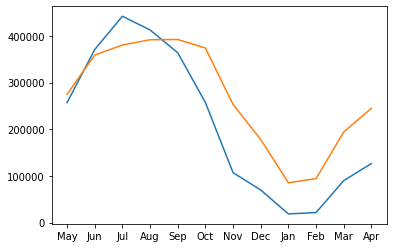

In [40]:
plt.plot(member_casual_count) # Like we've observed earlier, there is greater variability among casual riders.

In [41]:
# creating a pivot table of the average ride length of each group over 12 months.
member_casual_length = member_casual_ride.pivot_table(index='month', columns='member_casual', values='ride_length', sort=False)
member_casual_length

member_casual,casual,member
month,,
May,38.231169,14.639021
Jun,37.121873,14.678157
Jul,32.791112,14.238983
Aug,28.786617,14.101174
Sep,27.815474,13.735454
Oct,28.675485,12.501981
Nov,23.113804,11.304332
Dec,23.494867,11.004854
Jan,30.377862,11.983155


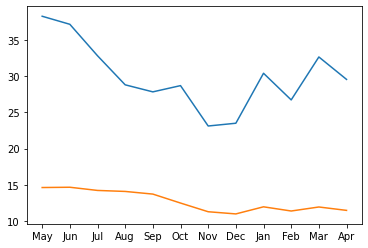

In [42]:
plt.plot(member_casual_length)

<font size='4'>How do casual riders and members differ in terms of how long they ride a Cyclistic bike? By making a quick visualization of average ride length for each group, it becomes clear that **casual riders tend to ride a Cyclistic bike for a significantly longer time throughout the year**.</font>

# <font size='5'>**3. Conclusions and insights**</font>


<font size='4'><p style='text-indent: 30px'>In this project, we analyzed the monthly trip data of bikeshare company Cyclistic from May 2021 to April 2022. Our analysis focused on identifying the yearly trend and change from month to month, as well as how casual riders and annual members' riding behaviours differ. We were able to accomplish the following:</p></font>

<font size='3'>1. We discovered that **warmer months May through October, are the popular months for riding**, while colder months November through April are much slower. </font><br>
<font size='3'>2. While going with the overall trend stated above, **casual riders show greater variability in terms of the amount of monthly rides in a year**. In other words, they have higher highs and lower lows than annual members.</font><br>
<font size='3'>3. On a weekly basis, both casual riders and annual members **ride more on Saturday and Sunday**.</font><br>
<font size='3'>4. We identified the **popular riding stations, such as Streeter Dr & Grand Ave**.</font>
<font size='3'>5. In terms of bike types, both casual riders and annual members **favor electric bikes and classic bikes over docked bikes**.</font><br>
<font size='3'>6. For duration of rides, **casual riders tend to consistently ride a bike for significantly longer time than annual members**.</font><br>

<font size='4'>Based on these discoveries, we make the following suggestions for any future marketing campaign to reach the largest number of customers:</font>

- <font size='3' style='color: blue;'>hold a campaign in warmer months, May through October(#1)</font>;
- <font size='3' style='color: blue;'>hold a campaign over the weekend, Saturday and Sunday(#3)</font>;
- <font size='3' style='color: blue;'>hold a campaigh at the identified popular riding stations, such as Streeter Dr & Grand Ave(#4)</font>;<br>

<font size='4'>**Further investigation**</font>
<p style='text-indent: 30px'><font size='4'>There are also some areas that need further investigation before we can confidently recommend the best course of action. For instance, we've discovered that electric bikes and classic bikes are favored over docked bikes, does that mean if we have more electric bikes and classic bikes at our stations, more customers will come and ride? At this point, we cannot reach that conclusion. For instance, maybe there are enough electric bikes and classic bikes in use to satisfy all the riding needs?</font></p>

<font size='4'><p style='text-indent: 30px'>Another trend shown by our data analysis is that casual riders tend to spend more time per ride than annual members, while members tend to make more rides more even in cold winter months.  What does this inform us about converting casual riders into annual members? One hypothesis is that if we increase the price of a day pass and keep the annual membership fee the same, we can potentially motivate casual riders into becoming members. But we need to experiment before we can decide if this is the case.</p></font>